# Chapter 3: Continuous random variables

```{epigraph}
*"Do the difficult things while they are easy and do the great things while they are small. A journey of a thousand miles must begin with a single step."*

-- Lao Tzu
```

```{seealso}
- [Continuous probability distribution](https://en.wikipedia.org/wiki/Probability_distribution#Absolutely_continuous_probability_distribution)
```


````{prf:definition} cumulative distribution function
:nonumber:
:label: cdf
The cumulative distribution function (CDF) of a real-valued random variable $X$, evaluated at $x$, is the probability that $X$ will take a value less than or equal to $x$

$$F(x)=P(X \leq x)$$
````
- $0\le F(x)\le 1$
- If $x\le y$, then $F(x)\le F(y)$. The CDF is a monotone increasing function  
- $\lim_{x\rightarrow -\infty} F(x) = P(X<-\infty) = 0$
- $\lim_{x\rightarrow \infty} F(x) = P(X<\infty) = 1$

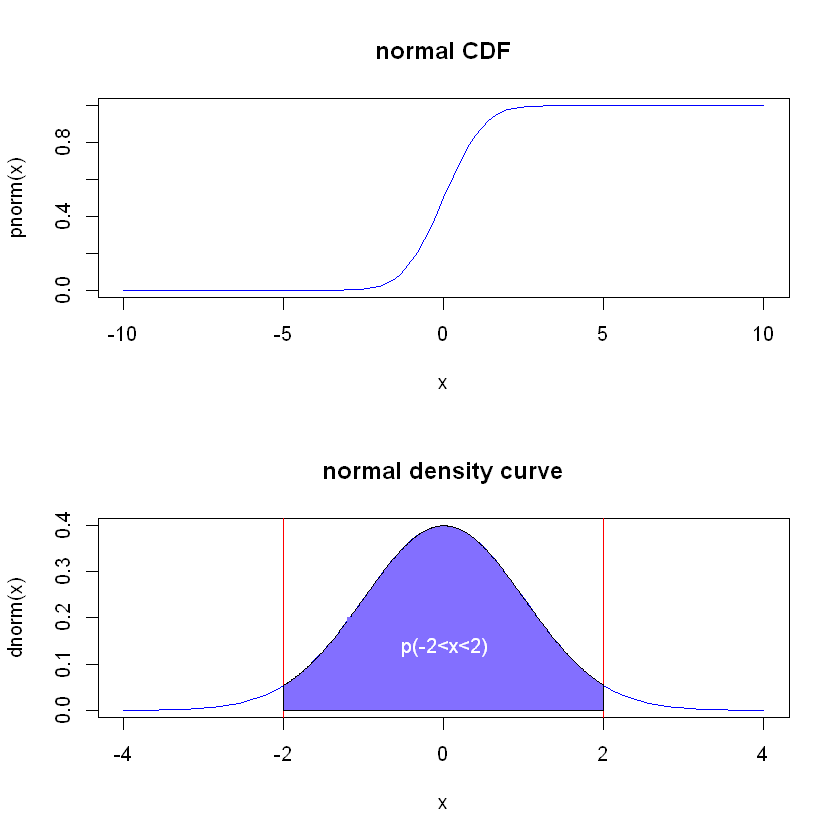

In [1]:
par(mfrow=c(2,1))
# plot normal CDF
curve(pnorm, from = -10, to = 10,col="blue", main="normal CDF")
# plot normal density
curve(dnorm, from=-4, to=4, col="blue", main="normal density curve")
abline(v=c(-2,2),col="red")

# shade the area under the curve
x = seq(-4,4,by=0.01)
y = dnorm(x)
den <- data.frame(x,y)

value1=-2
value2=2
polygon(c(value1,den$x[den$x >= value1 & den$x <= value2],value2),
        c(0, den$y[den$x >= value1 & den$x <= value2 ],0),
        col = "slateblue1", border = 1)
legend(-1.2,0.2,"p(-2<x<2)", text.col="white", border="slateblue1",fill="slateblue1", bg="slateblue1", box.col="slateblue1")

````{prf:definition} probability density function
:nonumber:
:label: pdf
The probability density function $f(x)$ is the derivate of the CDF at $x$, i.e.,

$$f(x)=\frac{d F(x)}{d x}$$
````

- $f(x)\ge 0$
- $F(x)=\int_{-\infty}^{x} f(y) d y$
- $\int_{-\infty}^\infty f(x)dx = 1$
- The probability $P(a<X<b)$ is the area under the density curve $f(x)$ between $a$ and $b$, 

$$P(a<X<b) = \int_a^b f(x)dx$$


````{prf:definition} expectation
:nonumber:
:label: expectation2
Let $f(x)$ be the density function of a random variable $X$. The expectation of $X$ is defined as

$$E(X)=\int_{-\infty}^{\infty} x f(x) d x$$

The expectation $E(X)$ is also called the population mean. 
````

Moreover, the expectation of the function $g(X)$ is defined as

$$E(g(X))=\int_{-\infty}^{\infty} g(x) f(x) d x$$

The variance of $X$ is defined as 

$$var(X) = E(X-E(X))^2$$

- $sd(X) = \sqrt{var(X)}$

````{prf:theorem}
1. $E(aX+b) = aE(X)+b$
2. $var(aX+b) = a^2var(x)$
3. $var(X) = E(X^2) - \left(E(X)\right)^2$

$$
\begin{equation}
\begin{split}
  E(aX+b) &= \int_{-\infty}^{\infty}(ax+b)f(x)dx \\
  &= \int_{-\infty}^{\infty}axf(x)dx + \int_{-\infty}^{\infty}bf(x)dx\\
  &= a\int_{-\infty}^{\infty}xf(x)dx + b\int_{-\infty}^{\infty}f(x)dx\\
  &= aE(X)+b
\end{split}
\end{equation}
$$

$$
\begin{equation}
\begin{split}
  var(aX+b) &= \int_{-\infty}^{\infty}\left(ax+b-(aE(x)+b)\right)^2f(x)dx \\
  &= \int_{-\infty}^{\infty}a^2(x-E(x))^2f(x)dx\\
  &= a^2var(X)
\end{split}
\end{equation}
$$

$$
\begin{equation}
\begin{split}
  var(X) &= \int_{-\infty}^{\infty}\left(x-E(x)\right)^2f(x)dx \\
  &= \int_{-\infty}^{\infty}(x^2-2xE(x)+E(x)^2)f(x)dx\\
  &= \int_{-\infty}^{\infty}x^2f(x)dx-2E(x)\int_{-\infty}^{\infty}xf(x)dx+E(x)^2\int_{-\infty}^{\infty}f(x)dx\\
  &= E(X^2) - \left(E(X)\right)^2
\end{split}
\end{equation}
$$

````

## Continuous probability distributions

### Uniform distribution
The uniform random variable represents the random numbers in an interval $[a,b]$.

- $f(x|a,b)=\frac{1}{b-a}$, for $x \in[a, b]$
- $F(x)=P(X \leq x)=\int_{a}^{x} \frac{1}{(b-a)} dy = \frac{x-a}{b-a}$
- $E(X)=\int_{a}^{b} x f(x) d x=\frac{a+b}{2}$
- $var(X)=\frac{(b-a)^2}{12}$

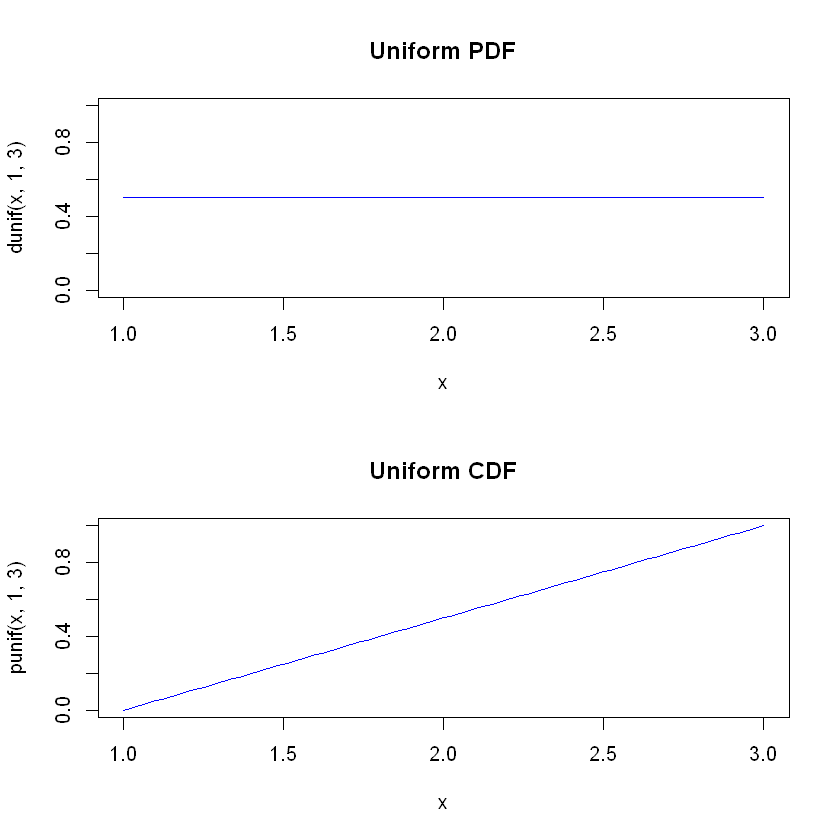

In [2]:
par(mfrow=c(2,1))
curve(dunif(x,1,3), from=1, to=3, main="Uniform PDF", col="blue", ylim=c(0,1))
curve(punif(x,1,3), from=1, to=3, main="Uniform CDF", col="blue", ylim=c(0,1))

````{prf:example}
:nonumber:

The random variable $X$ follows the uniform [2,4] distribution. Find $E(X)$, $var(X)$, and $P(X<2.7)$

$E(X)=(b+a)/2=3$ and $var(X) = (b-a)^2/12 = 1/3$ and $P(X<2.7) = (x-a)/(b-a) = 0.7/2=0.35$
````
### Normal distribution
The normal random variable represents the mean effect of many equally likely random variables. For example, the human body weight (or height) is a normal random variable because weight (or height) is the mean effect of many factors.

- $f(x|\mu,\sigma^2)=\frac{1}{\sqrt{2 \pi \sigma^{2}}} e^{-\frac{(x-u)^{2}}{2 \sigma^{2}}}$, for $x \in[-\infty, \infty]$
- $E(X)=u$ and $var(X)=\sigma^{2}$

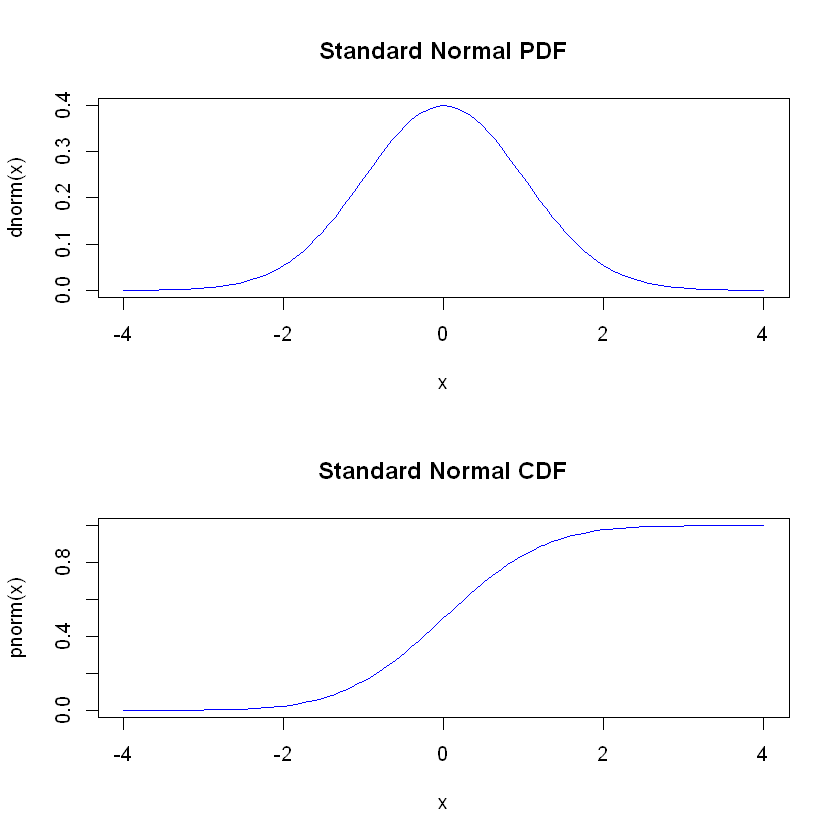

In [3]:
par(mfrow=c(2,1))
curve(dnorm(x), from=-4, to=4, main="Standard Normal PDF", col="blue")
curve(pnorm(x), from=-4, to=4, main="Standard Normal CDF", col="blue")

If a random variable $X \sim Normal(\mu,\sigma^{2})$, then $Y=aX+b$ follows $Normal(a\mu+b,a^{2} \sigma^{2})$. 

To calculate the normal probabilities, we first standardize the normal random variable $\frac{X-E(X)}{sd(X)}$ and then use the standard normal distribution to calculate probabilities,

$$P(X<d)=P\left(\frac{X-u}{\sigma}<\frac{d-u}{\sigma}\right) = P\left(Z<\frac{d-u}{\sigma}\right)$$

```{admonition} 68-95-99 rule
1. 68% of the population is within 1 standard deviation of the mean.
2. 95% of the population is within 2 standard deviation of the mean.
3. 99% of the population is within 3 standard deviation of the mean.
```

````{prf:example}
:nonumber:
If $X \sim Normal(\mu=1,\sigma^2=1)$, find $E(X^2)$ and $P(X>2)$

$E(X^2) = var(X)+(E(X))^2 = 1+1 = 2$ and $P(X>2) = P\left(\frac{X-\mu}{\sigma}>\frac{2-1}{1}\right)= P(Z>1)$ where $Z \sim Normal(0,1)$. We know from the 68-95-99 rule that $P(-1<Z<1) \approx 0.68$. Thus, $P(Z>1) = (1 - 0.68)/2 = 0.16$.
````

### Exponential distribution
The exponential random variable often represents the waiting time until the next event. For example, the waiting time until the next phone call follows the exponential distribution.

- $f(x)=\frac{1}{\lambda} e^{-\frac{x}{\lambda}}$, for $x>0$ and $\lambda>0$
- $F(x)=1-e^{-\frac{x}{\lambda}}$
- $E(X)=\lambda$ 
- $var(X)=\lambda^{2}$

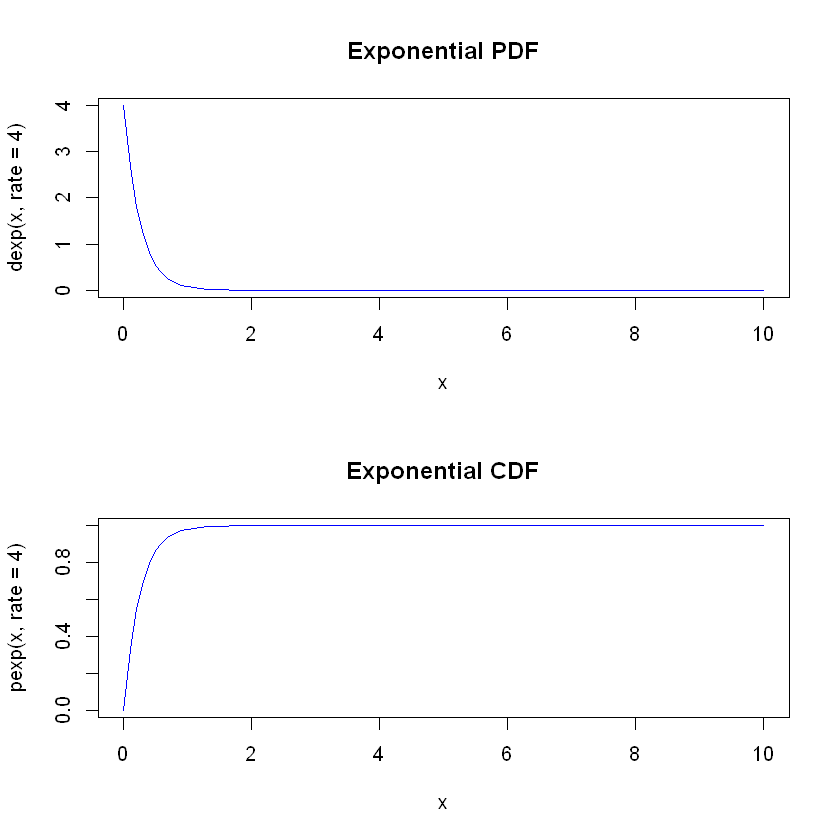

In [4]:
par(mfrow=c(2,1))
curve(dexp(x,rate=4), 0, 10, main="Exponential PDF",col="blue")
curve(pexp(x,rate=4), 0, 10, main="Exponential CDF",col="blue")

### Beta distribution
We often use the Beta distribution to model probabilities.

- $f(x)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)} x^{\alpha-1}(1-x)^{\beta-1}, 0 \leq x \leq 1, \alpha>0, \beta>0$
- $E(X)=\frac{\alpha}{\alpha+\beta}$
- $var(X)=\frac{\alpha \beta}{(\alpha+\beta)^{2}(\alpha+\beta+1)}$

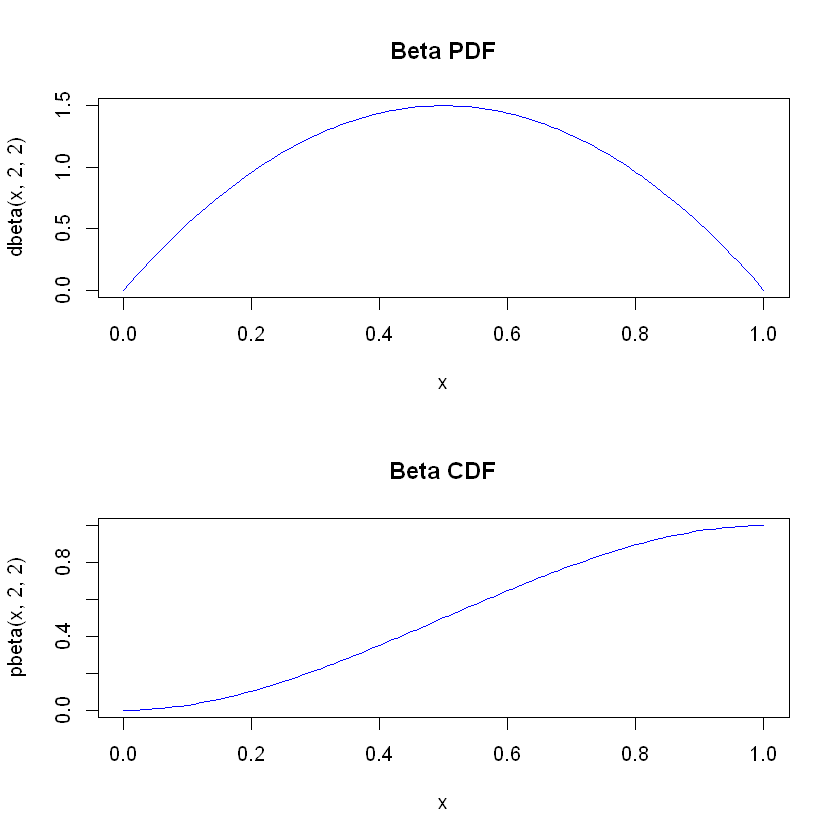

In [5]:
par(mfrow=c(2,1))
curve(dbeta(x,2,2),0,1, main="Beta PDF",col="blue")
curve(pbeta(x,2,2),0,1, main="Beta CDF",col="blue")

### Gamma distribution
We often use the Gamma distribution to model ratios, for example, mutation rates.

- $f(x)=\frac{1}{\Gamma(\alpha) \beta^{\alpha}} x^{\alpha-1} e^{-\frac{x}{\beta}}, x>0, \alpha>0, \beta>0$
- $E(X)=\alpha \beta$
- $var(X)=\alpha \beta^{2}$

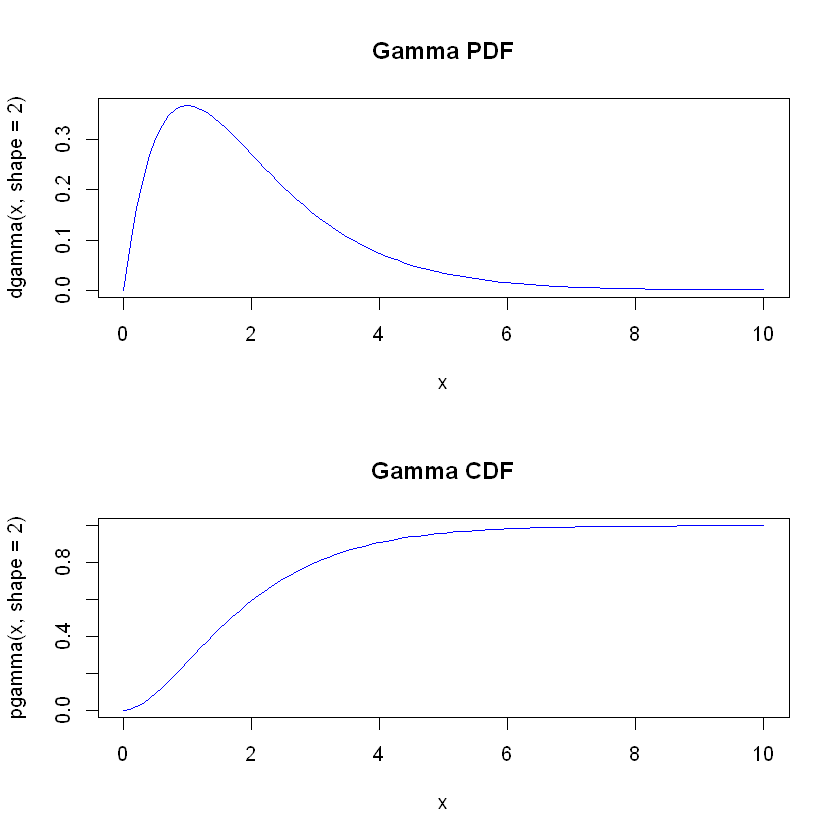

In [6]:
par(mfrow=c(2,1))
curve(dgamma(x,shape=2), 0, 10, main="Gamma PDF",col="blue")
curve(pgamma(x,shape=2), 0, 10, main="Gamma CDF",col="blue")

## Transformation

Three commonly used techniques can be used to find the probability distribution of a transformed continuous random variable.

### CDF 

Suppose $Y=g(X)$ and we want to find the probability distribution of $Y$.

$$
P(Y \leq a)=P(g(X) \leq a)=\int_{g(x) \leq a} f(x) d x
$$

````{prf:example} 
:nonumber:

Suppose $X$ is an exponential random variable with a density $e^{-x}$. Find the probability distribution of $Y=2X$

$$P(Y\le a) = P(2X \le a) = P(X\le a/2) = 1-e^{-a/2}$$

The density function is the derivative of the CDF $1-e^{-a/2}$ with respect to $a$,

$$(1-e^{-a/2})'=\frac{1}{2}e^{-\frac{a}{2}}$$

This is an exponential density with $\lambda = 2$.
````

### PDF
Suppose that the inverse function $g^{-1}(X)$ exists and is an increasing function.

$$
P(Y \leq a)=P(g(X) \leq a)=P\left(X \leq g^{-1}(a)\right)=F_{X}\left(g^{-1}(a)\right)
$$

Thus, the density function of $Y$ is given by

$$
f_{Y}(a)=F^{\prime}{ }_{X}\left(g^{-1}(a)\right)=f_{x}\left(g^{-1}(a)\right) * \frac{d g^{-1}(a)}{d a}
$$

If $g^{-1}(X)$ is a decreasing function, then

$$
P(Y \leq a)=P(g(X) \leq a)=P\left(X > g^{-1}(a)\right)=1-F_{X}\left(g^{-1}(a)\right)
$$

and 

$$
f_{Y}(a)=-F^{\prime}{ }_{X}\left(g^{-1}(a)\right)=-f_{X}\left(g^{-1}(a)\right) * \frac{d g^{-1}(a)}{d a}
$$

Combining two (increasing or decreasing), we have

$$
f_{Y}(y)=f_{X}\left(g^{-1}(y)\right) *\left|\frac{d g^{-1}(y)}{d y}\right|
$$

````{prf:example} 3.1
:nonumber:
:label: 3.1
:nonumber:
The random variable $X$ is an exponential random variable with density function $f(x)=\lambda e^{-\lambda x}$. Find the distribution of $Y=X+2$. The inverse function is $X=Y-2$. Thus, for $y>2$

$$
f_{y}(y)=\lambda e^{-\lambda(y-2)}\left|\frac{d(y-2)}{d y}\right|=\lambda e^{-\lambda(y-2)}
$$
````

### MGF (moment generating function)

If two random variables $X$ and $Y$ are independent, we can show that

$$
M_{X+Y}(t)=M_{X}(t) M_{Y}(t)
$$

````{prf:example} 3.2
:nonumber:
:label: 3.2
:nonumber:
The MGF of a normal random variable is $e^{u t+\sigma^{2} t^{2} / 2}$. Suppose $X_{1}, X_{2}, \ldots, X_{n}$ $\sim Normal\left(u, \sigma^{2}\right)$. Find the probability distribution of the sample average $\frac{\sum_{i=1}^{n} X_{i}}{n}$. 

We first find the MGF of the sum $\sum_{i=1}^{n} X_{i}$, which is equal to

$$
\prod_{i=1}^{n} M(t)=e^{n u t+n \sigma^{2} t^{2} / 2}
$$

The sum $\sum_{i=1}^{n} X_{i}$ has a normal distribution with mean $n \mu$ and variance $n \sigma^{2}$. 

Let $Y=\sum_{i=1}^{n} X_{i}$ and $Z=\frac{Y}{n}$. Then, 

$$E\left(e^{t Z}\right)=E\left(e^{\frac{t Y}{n}}\right)=e^{u t+\frac{\sigma^{2} t^{2}}{2 n}}$$
 
Thus, the sample average $\frac{1}{n}\sum_{i=1}^{n} X_{i}$ has a normal distribution with mean $\mu$ and variance $\frac{\sigma^{2}}{n}$.
````